# Fifth homework for computational mathematics course

In [2]:
import numpy as np
from scipy.optimize import minimize
from scipy.linalg import svdvals
import pylab as plt

## Exercise 1

In [26]:
def Lp_vec (x, p):
    return np.sum(np.abs(x)**p)**(1/p)

def Lp_mat (A, p):
    x0 = np.random.rand(len(A))
    fun = lambda x: -Lp_vec(A@x, p)/Lp_vec(x, p)
    
    x = minimize(fun,x0).x
    
    return Lp_vec(A@x, p)/Lp_vec(x, p)

def mu_p(A, p):
    return Lp_mat(A, p)*Lp_mat(np.linalg.inv(A), p)

In [27]:
A = np.random.rand(5,5)
mu_p(A, 4)

528.552510238319

## Exercise 2

In [4]:
def frob(A):
    return(np.sqrt(np.sum(svdvals(A)**2)))

def L2_mat (x):
    return np.sqrt(np.max(np.linalg.eigvals(x.T@x)))

0.0


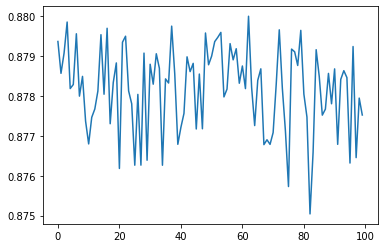

In [8]:
leng = 100

frobs = np.zeros((100, leng))
L2 = np.zeros((100, leng))
ans = np.zeros((100, leng))
for n in range(1, 101):
    for i in range(leng):
        A = np.random.rand(n, n)
        frobs[n-1][i] = frob(A)
        L2[n-1][i] = L2_mat(A)
        if not (frobs[n-1][i]/np.sqrt(n) <= L2[n-1][i] and L2[n-1][i] <= frobs[n-1][i]):
            ans[n-1][i] = 1
            
means = np.mean(L2/frobs, axis=0)
plt.plot(means)
print(np.sum(ans))

## Exercise 3

In [13]:
def func(Covar, N, locs=None, scales=None):
    if locs == None:
        locs = np.zeros(N)
    if scales == None:
        scales=np.ones(N)
    L = np.linalg.cholesky(Covar)
    z = np.random.normal(loc=locs, scale=scales, size=(len(L), N))
    return locs + L@z    

In [56]:
func(np.eye(3), 2)

array([[ 0.61748267,  0.08770594],
       [ 0.3587529 ,  0.30831193],
       [ 0.35309538, -0.58031446]])

[[ 0.08642645 -0.00377689 -0.00299894 ... -0.00629477  0.00026369
  -0.00127726]
 [-0.00377689  0.08190959 -0.00179038 ...  0.0008058   0.00136556
  -0.00158446]
 [-0.00299894 -0.00179038  0.08267256 ...  0.00231598 -0.00156518
  -0.00092066]
 ...
 [-0.00629477  0.0008058   0.00231598 ...  0.07923671  0.00389174
   0.00304855]
 [ 0.00026369  0.00136556 -0.00156518 ...  0.00389174  0.0825451
   0.00188008]
 [-0.00127726 -0.00158446 -0.00092066 ...  0.00304855  0.00188008
   0.08113558]]


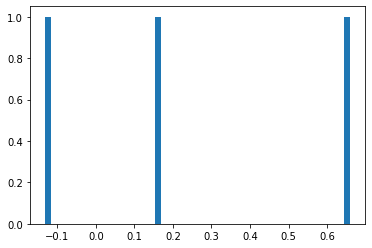

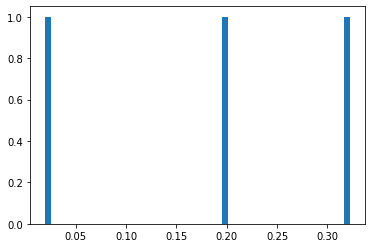

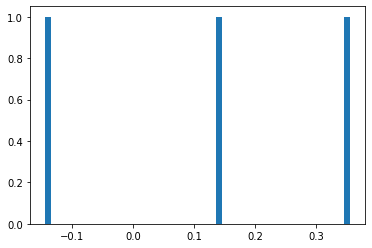

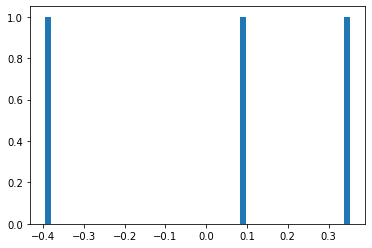

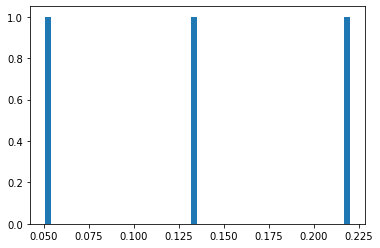

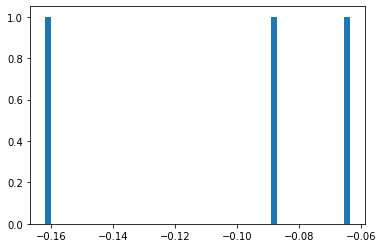

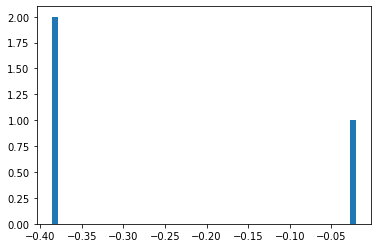

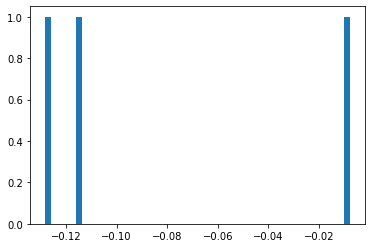

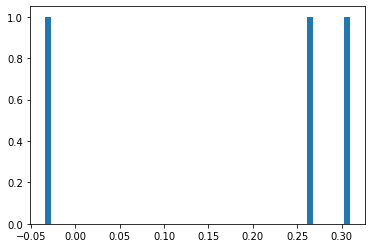

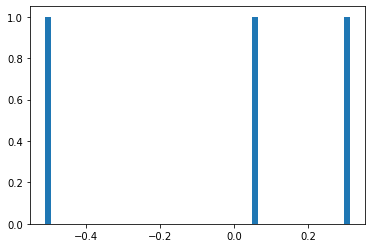

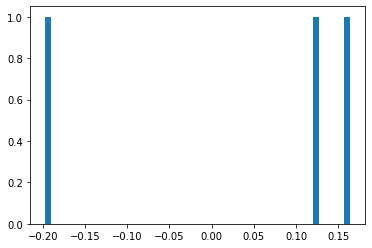

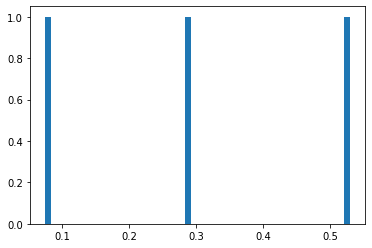

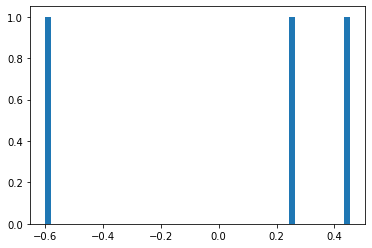

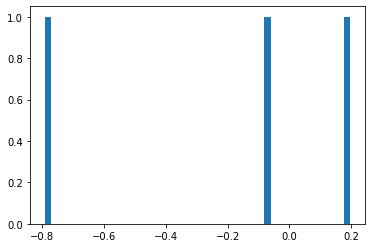

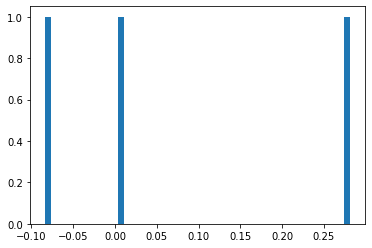

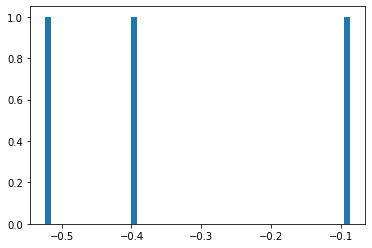

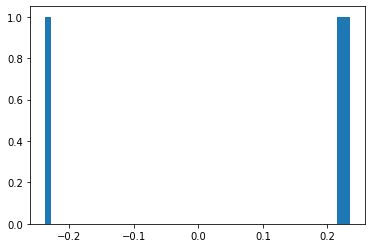

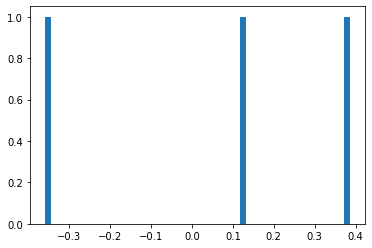

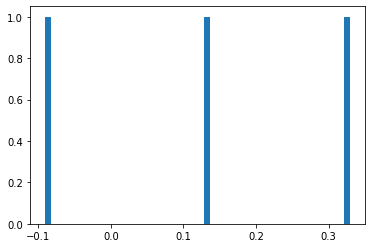

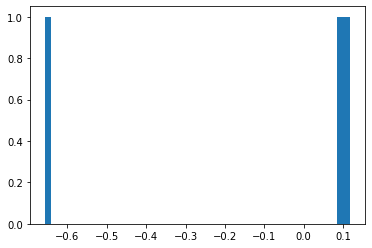

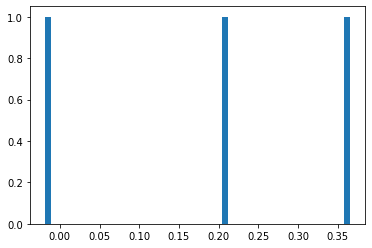

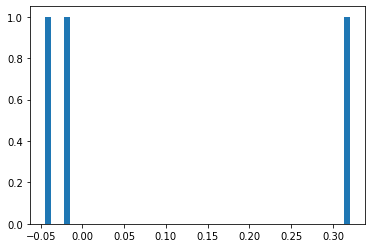

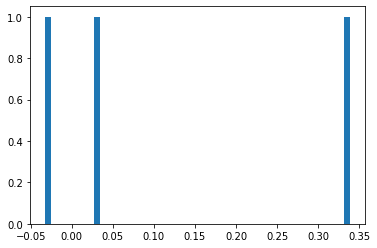

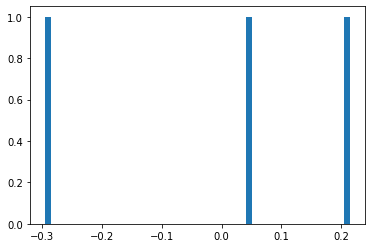

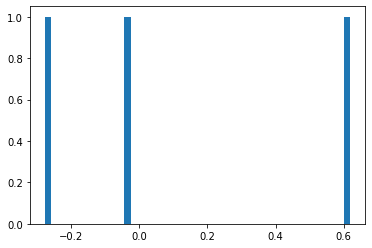

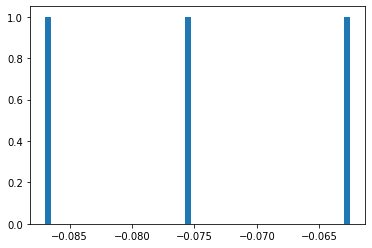

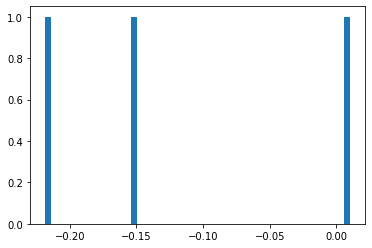

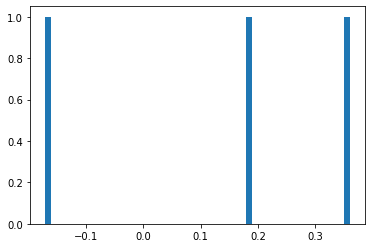

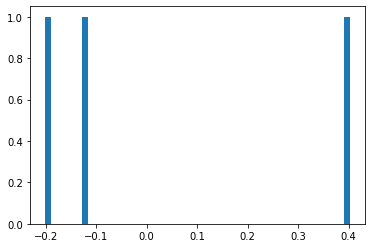

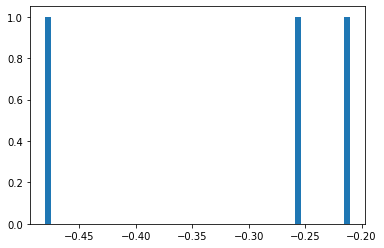

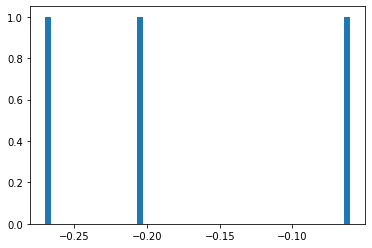

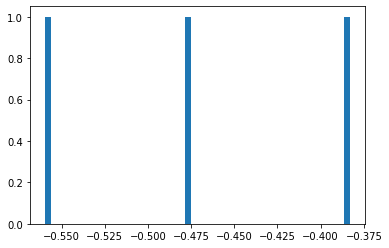

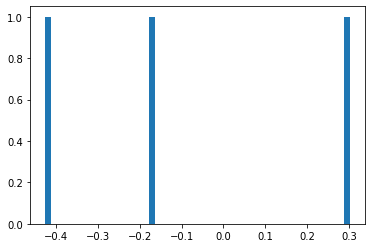

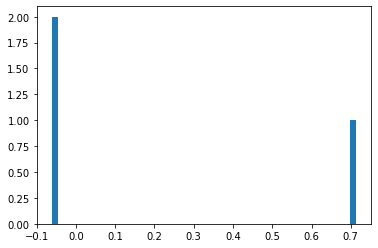

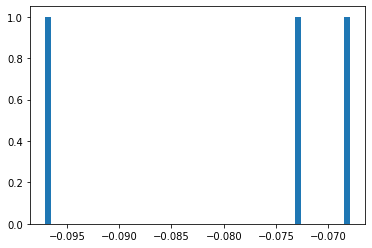

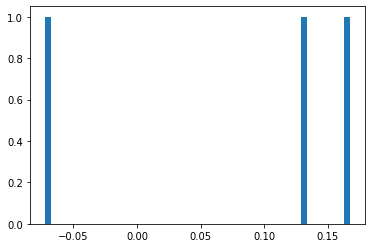

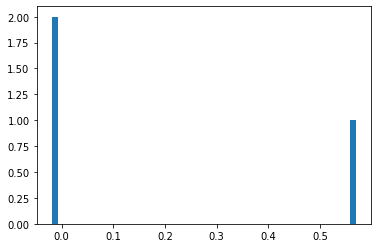

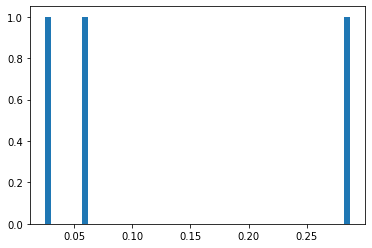

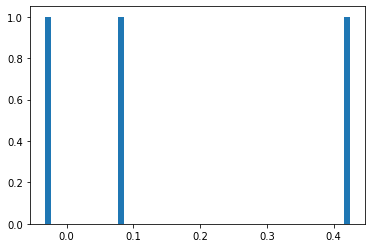

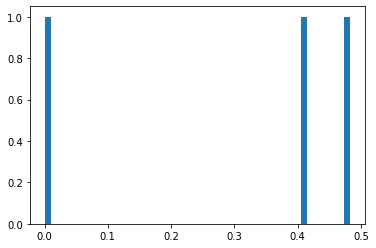

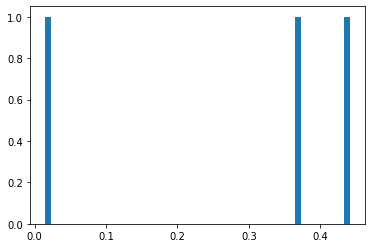

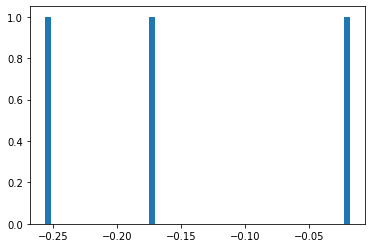

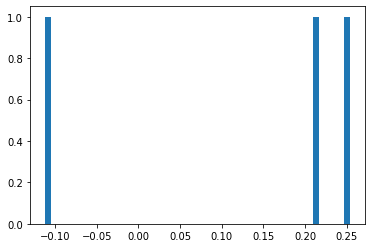

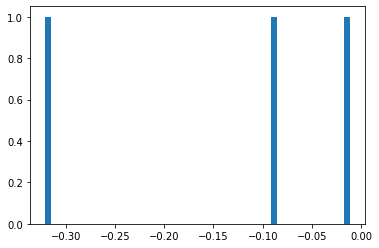

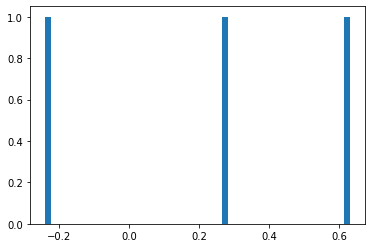

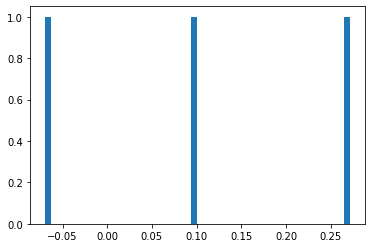

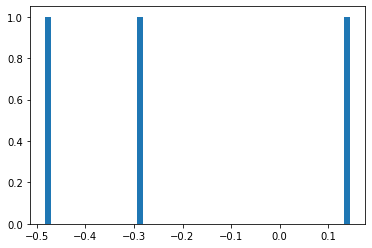

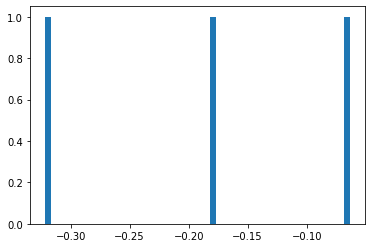

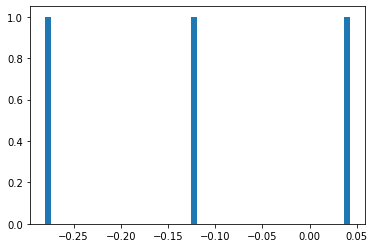

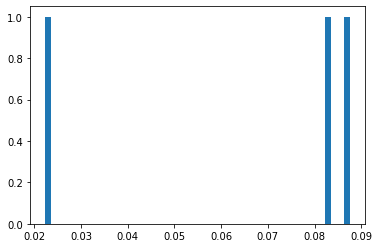

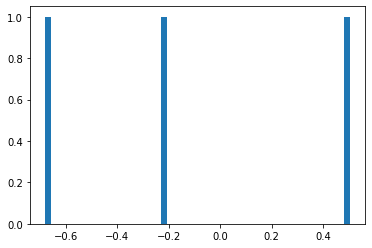

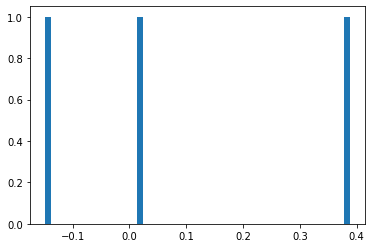

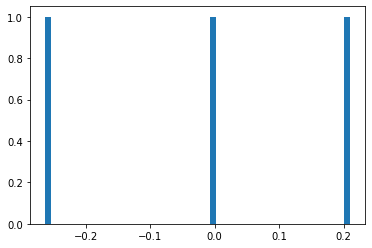

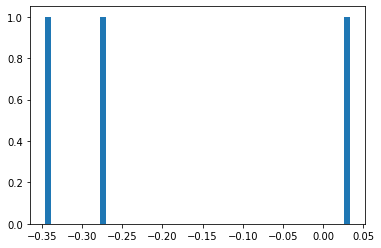

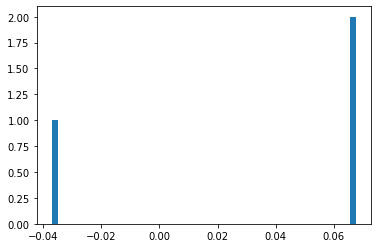

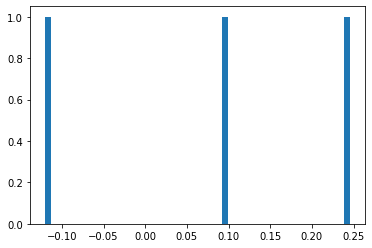

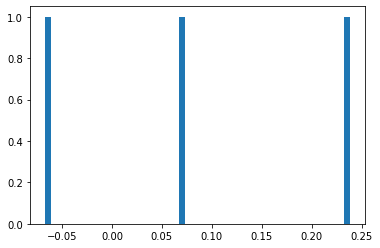

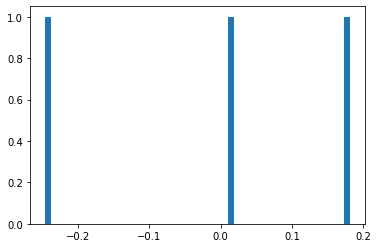

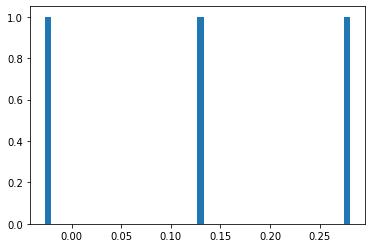

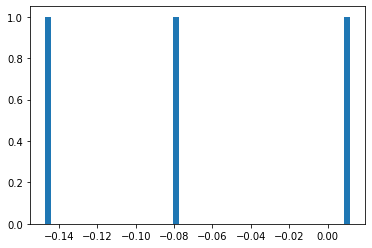

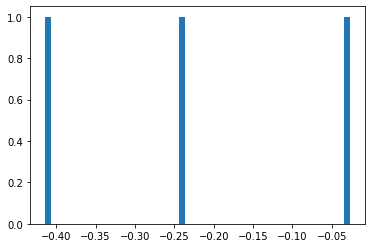

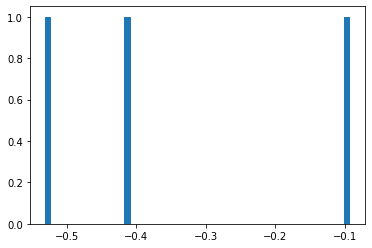

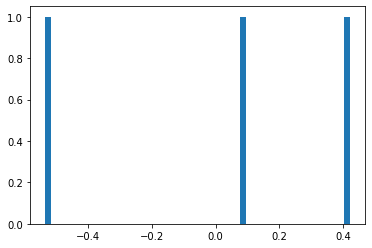

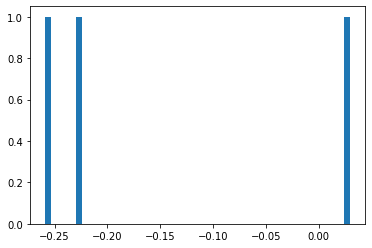

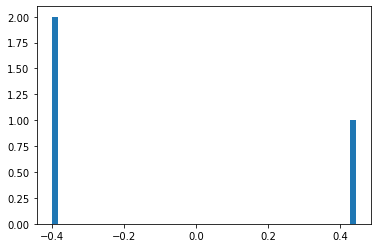

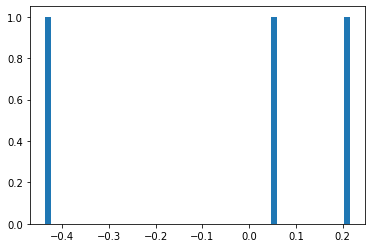

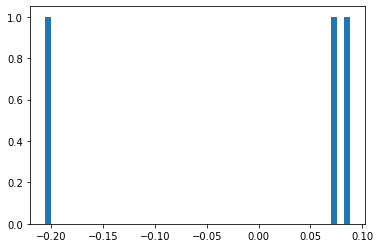

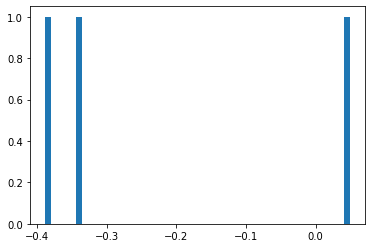

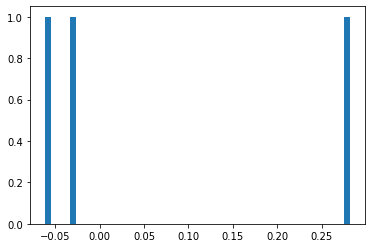

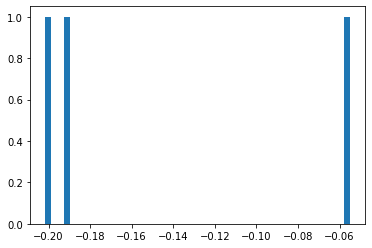

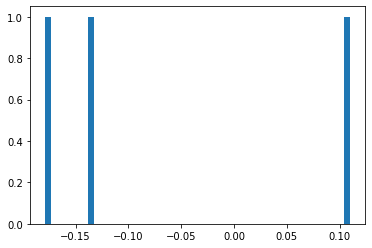

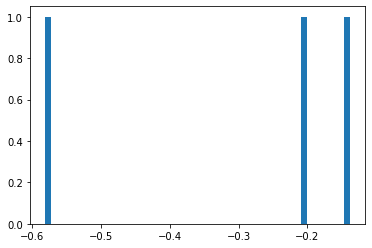

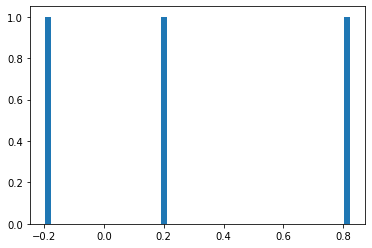

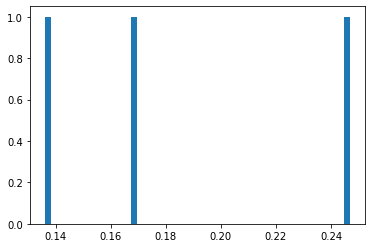

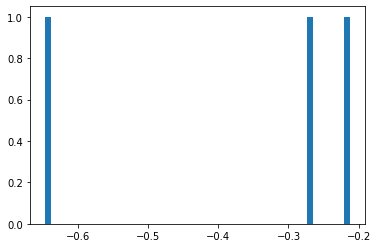

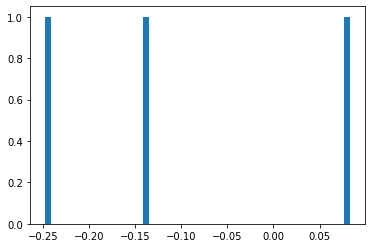

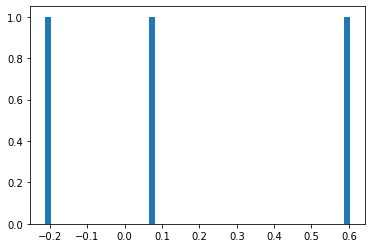

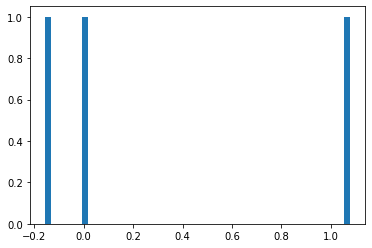

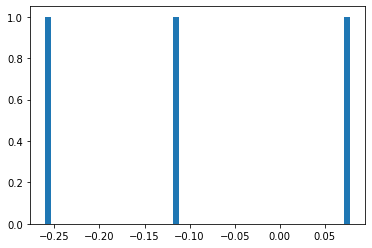

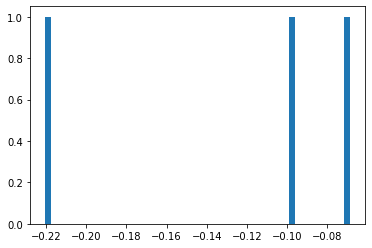

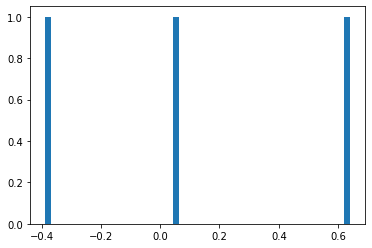

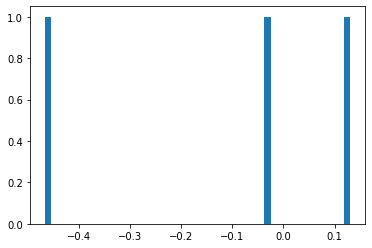

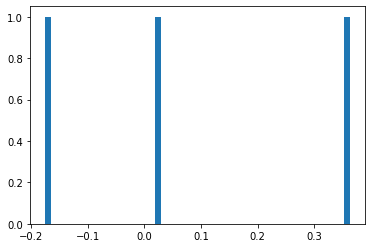

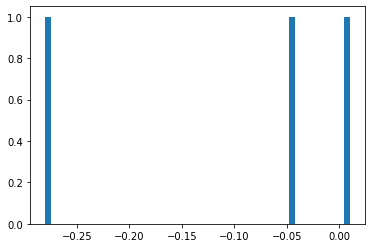

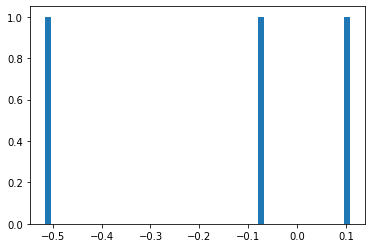

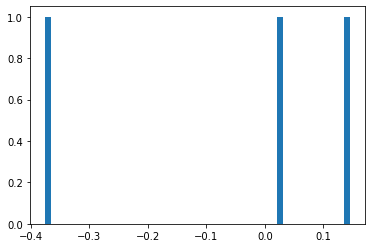

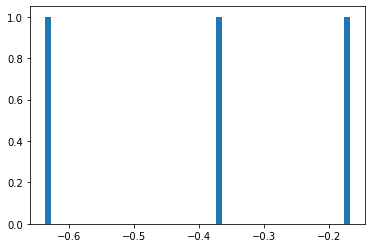

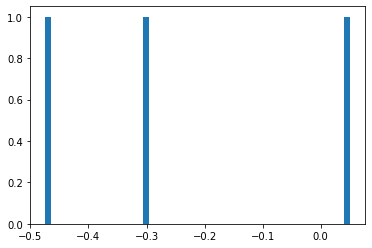

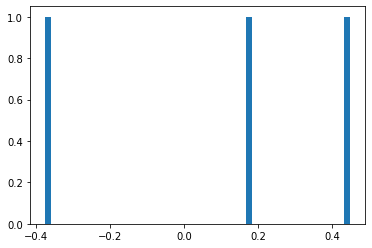

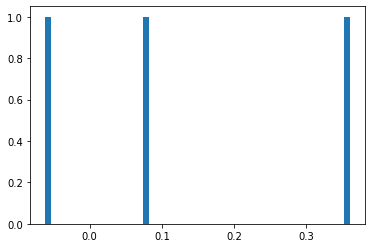

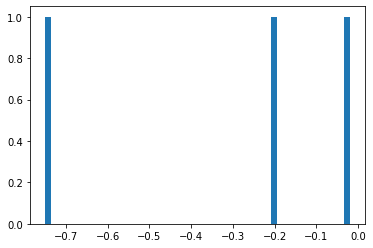

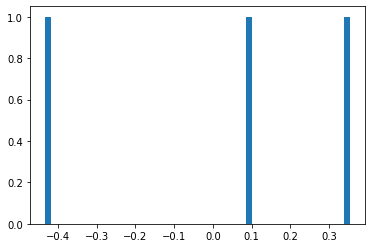

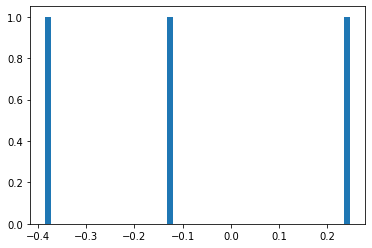

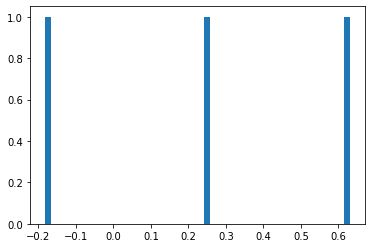

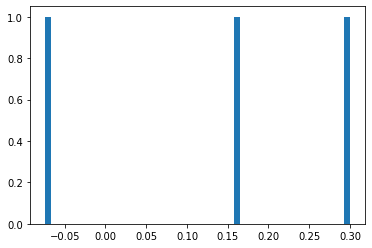

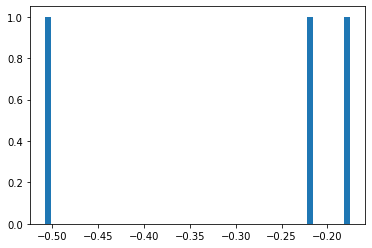

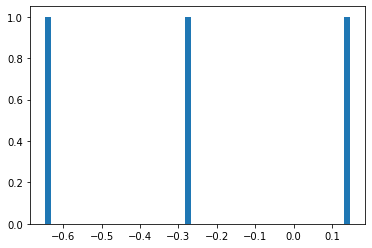

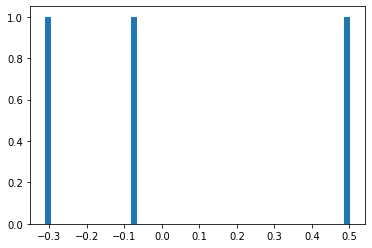

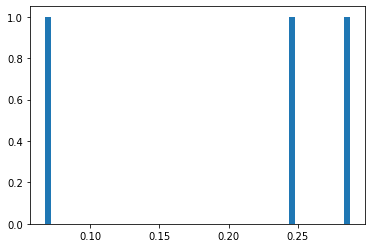

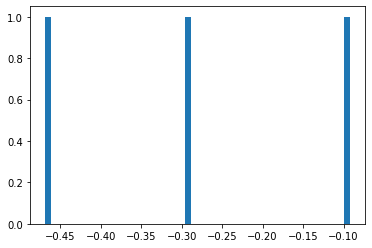

In [47]:
samples = np.random.rand(100, 1000)
Covar = np.cov(samples)

print(Covar)

new = func(Covar, 10)
for line in new:
    plt.hist(line, bins=50)
    plt.show()

## Exercise 4

In [25]:
def procr(X1, X2):
    X1_ = X1 - np.ones(len(X1)).reshape(len(X1),1)@np.mean(X1, axis=0).reshape(1,2)
    X2_ = X2 - np.ones(len(X2)).reshape(len(X2),1)@np.mean(X2, axis=0).reshape(1,2)

    u, s, vh = np.linalg.svd(X1_.T@X2_)

    R = u@vh

    mu = np.mean(X2, axis=0).reshape(2,1) - R.T@np.mean(X1, axis=0).reshape(2,1)
    return mu, R

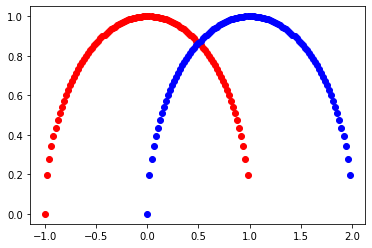

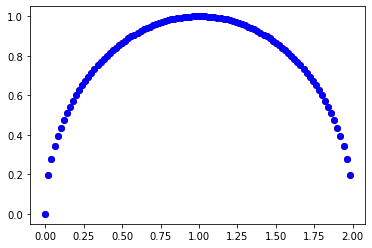

In [150]:
x1 = np.arange(-1, 1, 0.02).reshape(100, 1)
y1 = np.sqrt(np.ones(100).reshape(100, 1) - x1**2)
x2 = np.arange(0, 2, 0.02).reshape(100, 1)
y2 = np.sqrt(np.ones(100).reshape(100, 1) - (x2 - np.ones(100).reshape(100, 1))**2)
X1 = np.concatenate((x1, y1), axis=1)
X2 = np.concatenate((x2, y2), axis=1)

plt.scatter(X1.T[0], X1.T[1], c='r')
plt.scatter(X2.T[0], X2.T[1], c='b')
plt.show()

mu, R = procr(X1, X2)
X1 = X1@R + np.ones(len(X1)).reshape(len(X1),1)*mu.T
plt.scatter(X1.T[0], X1.T[1], c='r')
plt.scatter(X2.T[0], X2.T[1], c='b')

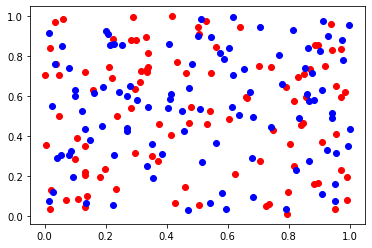

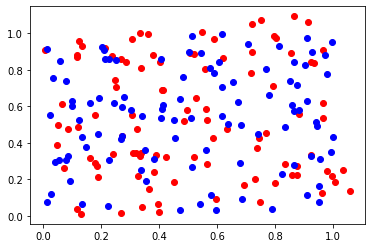

In [151]:
x1 = np.random.rand(100,1)
y1 = np.random.rand(100,1)
x2 = np.random.rand(100,1)
y2 = np.random.rand(100,1)
X1 = np.concatenate((x1, y1), axis=1)
X2 = np.concatenate((x2, y2), axis=1)

plt.scatter(X1.T[0], X1.T[1], c='r')
plt.scatter(X2.T[0], X2.T[1], c='b')
plt.show()

mu, R = procr(X1, X2)
X1 = X1@R + np.ones(len(X1)).reshape(len(X1),1)*mu.T
plt.scatter(X1.T[0], X1.T[1], c='r')
plt.scatter(X2.T[0], X2.T[1], c='b')

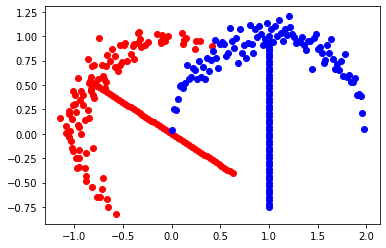

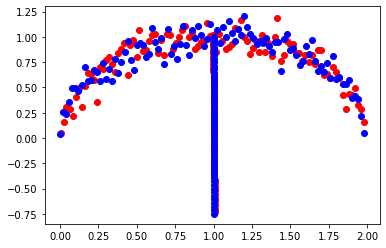

In [39]:
x1 = np.arange(-1, 1, 0.02).reshape(100, 1)
y1 = np.sqrt(np.ones(100).reshape(100, 1) - x1**2) + np.random.normal(0, 0.1, (100, 1))
x2 = np.arange(0, 2, 0.02).reshape(100, 1)
y2 = np.sqrt(np.ones(100).reshape(100, 1) - (x2 - np.ones(100).reshape(100, 1))**2) + np.random.normal(0, 0.1, (100, 1))

x2_ = np.ones((50, 1))
y2_ = np.linspace(-0.75, 1, 50).reshape(50, 1)
x1_ = np.zeros((50, 1))
y1_ = np.linspace(-0.75, 1, 50).reshape(50, 1)

X1 = np.concatenate((x1, y1), axis=1)
X2 = np.concatenate((x2, y2), axis=1)
X1_ = np.concatenate((x1_, y1_), axis=1)
X2_ = np.concatenate((x2_, y2_), axis=1)

X1 = np.concatenate((X1, X1_), axis=0)
X2 = np.concatenate((X2, X2_), axis=0)


phi=1
M = np.array([[np.cos(phi), -1*np.sin(phi)], [np.sin(phi), np.cos(phi)]])
X1 = (M@X1.T).T



plt.scatter(X1.T[0], X1.T[1], c='r')
plt.scatter(X2.T[0], X2.T[1], c='b')
plt.show()

mu, R = procr(X1, X2)
X1 = X1@R + np.ones(len(X1)).reshape(len(X1),1)*mu.T
plt.scatter(X1.T[0], X1.T[1], c='r')
plt.scatter(X2.T[0], X2.T[1], c='b')
